#Stroke Prediction Model 2nd Dataset NO Preprocessing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Library Imports

In [25]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report 

##Dataset Import

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dissertation/health_data.csv")

In [5]:
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

In [7]:
data.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.500000,0.563458,0.062171
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.500004,0.495960,0.241468
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Find missing data within the dataset
data.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

#Data Pre-processing

###Data Splitting

In [9]:
x_input = data.drop(['Stroke'], axis = 1)
y_output = data['Stroke']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_input, y_output, test_size= 0.2, random_state= 42)

In [12]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', y_test.shape)

Shape of X_train:  (56553, 17)
Shape of y_train:  (56553,)
Shape of X_test:  (14139, 17)
Shape of Y_test:  (14139,)


###Model Training

###Artificial Neural Network

In [15]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [16]:
model.fit(X_train, y_train, batch_size=10, epochs = 100)

Epoch 1/100
5656/5656 [==============================] - 11s 2ms/step - loss: 0.2164 - accuracy: 0.9364
Epoch 2/100
5656/5656 [==============================] - 10s 2ms/step - loss: 0.2027 - accuracy: 0.9382
Epoch 3/100
5656/5656 [==============================] - 10s 2ms/step - loss: 0.2004 - accuracy: 0.9382
Epoch 4/100
5656/5656 [==============================] - 10s 2ms/step - loss: 0.1993 - accuracy: 0.9382
Epoch 5/100
5656/5656 [==============================] - 11s 2ms/step - loss: 0.1986 - accuracy: 0.9382
Epoch 6/100
5656/5656 [==============================] - 9s 2ms/step - loss: 0.1981 - accuracy: 0.9382
Epoch 7/100
5656/5656 [==============================] - 10s 2ms/step - loss: 0.1981 - accuracy: 0.9382
Epoch 8/100
5656/5656 [==============================] - 10s 2ms/step - loss: 0.1975 - accuracy: 0.9382
Epoch 9/100
5656/5656 [==============================] - 9s 2ms/step - loss: 0.1976 - accuracy: 0.9382
Epoch 10/100
5656/5656 [==============================] - 9s 2ms/s

In [17]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

442/442 [==============================] - 1s 1ms/step


In [22]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R square:', r2_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Mean Squared Error: 0.06351227102341042
R square: -0.06781965108375498
Accuracy: 0.9364877289765896
              precision    recall  f1-score   support

         0.0     0.9365    1.0000    0.9672     13241
         1.0     0.0000    0.0000    0.0000       898

    accuracy                         0.9365     14139
   macro avg     0.4682    0.5000    0.4836     14139
weighted avg     0.8770    0.9365    0.9058     14139

[[13241     0]
 [  898     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


442/442 [==============================] - 1s 2ms/step


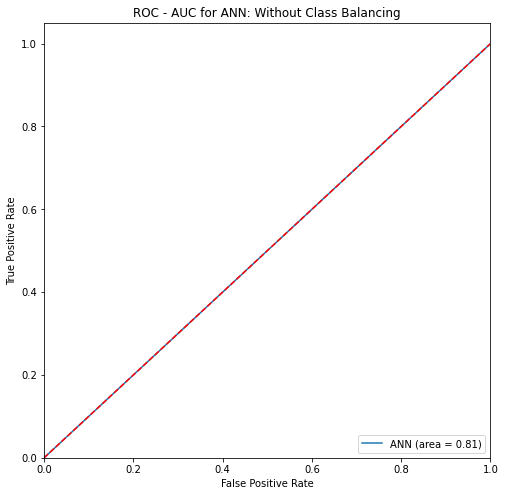

In [24]:
ANN_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN: Without Class Balancing')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

###Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [27]:
rf_pred = rf.predict(X_test)

In [28]:
report = classification_report(y_test, rf_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9384    0.9897    0.9634     13241
         1.0     0.2184    0.0423    0.0709       898

    accuracy                         0.9296     14139
   macro avg     0.5784    0.5160    0.5171     14139
weighted avg     0.8927    0.9296    0.9067     14139



Text(0.5, 0, 'False Positive Rate')

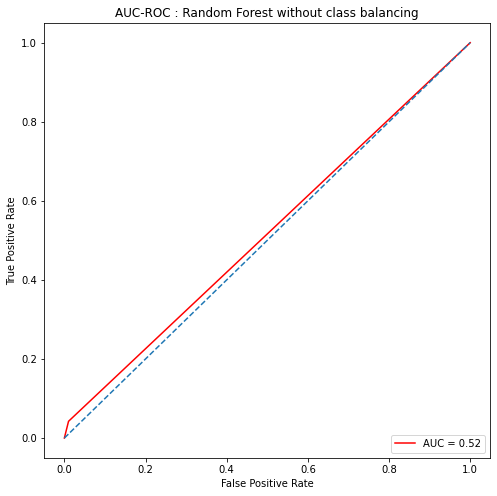

In [30]:
rf_auc = roc_auc_score(y_test, rf_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest without class balancing')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###Genetic Algorithm with Neural Network

In [31]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.7 MB/s 


In [32]:
import pygad
import pygad.nn
import pygad.gann

In [34]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=data_inputs, problem_type="classification")
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100
    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}%".format(fitness=ga_instance.best_solution()[1]))

In [35]:
data_inputs = np.array(X_train)
data_outputs = np.array(y_train)

In [36]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=data_inputs.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [38]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [39]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=2,
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

/usr/local/lib/python3.8/dist-packages/pygad/pygad.py:764: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


In [40]:
ga_instance.run()

Generation = 1
Accuracy   = 93.81641999540254%
Generation = 2
Accuracy   = 93.81641999540254%
Generation = 3
Accuracy   = 93.81641999540254%
Generation = 4
Accuracy   = 93.81641999540254%
Generation = 5
Accuracy   = 93.81641999540254%
Generation = 6
Accuracy   = 93.81641999540254%
Generation = 7
Accuracy   = 93.81641999540254%
Generation = 8
Accuracy   = 93.81641999540254%
Generation = 9
Accuracy   = 93.81641999540254%
Generation = 10
Accuracy   = 93.81641999540254%
Generation = 11
Accuracy   = 93.81641999540254%
Generation = 12
Accuracy   = 93.81641999540254%
Generation = 13
Accuracy   = 93.81641999540254%
Generation = 14
Accuracy   = 93.81641999540254%
Generation = 15
Accuracy   = 93.81641999540254%
Generation = 16
Accuracy   = 93.81641999540254%
Generation = 17
Accuracy   = 93.81641999540254%
Generation = 18
Accuracy   = 93.81641999540254%
Generation = 19
Accuracy   = 93.81641999540254%
Generation = 20
Accuracy   = 93.81641999540254%
Generation = 21
Accuracy   = 93.81641999540254%
G

/usr/local/lib/python3.8/dist-packages/pygad/pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


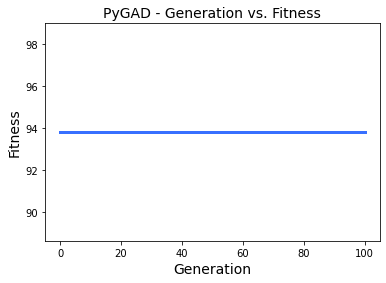

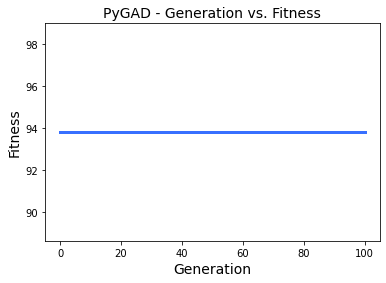

In [41]:
ga_instance.plot_result()

In [42]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[ 1.11641829  1.18673666 -0.23681556 -1.56392815  0.55524442  0.03258411
  0.21410408  0.88163887  0.9705284   0.54067629 -0.13653312 -0.21368628
  0.83660328  0.07802929 -1.63251498  1.90638635  0.17011893  1.78875396
 -0.75973228  0.03750224 -0.69187145  1.05494038 -1.16680299  1.16683248
  1.0580766   0.22412582  0.58706816  2.0378097  -0.01608162  0.12063712
 -1.00734546 -0.32795384 -0.03285258 -0.04210707  0.00642819  0.03095245
 -0.97811764  0.3777666 ]
93.81641999540254
0


In [45]:
print("Best solution (Accuracy) for GA without class balancing:", solution_fitness)

Best solution (Accuracy) for GA without class balancing: 93.81641999540254
